# Import

## Library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Calculate the Accuracy
from sklearn.metrics import accuracy_score

# 3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 

# For scaler Data
from sklearn.preprocessing import StandardScaler
# Regression 
from sklearn.linear_model import LinearRegression

# MSE and R2
import sklearn.metrics as metrics


from regressors import stats

In [45]:
sns.set(style ="whitegrid", context ="notebook")

## DataSet

In [46]:
df = pd.read_csv('insurance.csv')

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
print(f'The data set has : {df.shape[0]} Rows.')
print(f'The data set has : {df.shape[1]}    Columns.')

The data set has : 1338 Rows.
The data set has : 7    Columns.


In [49]:
type((len(df)))

int

# Exploration

## Look NaNs

In [50]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [51]:
import missingno as msno
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Histogram 

<AxesSubplot:>

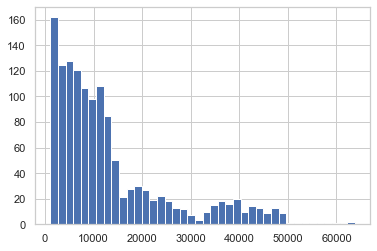

In [52]:
df.charges.hist(bins=40)

## Pairlpot

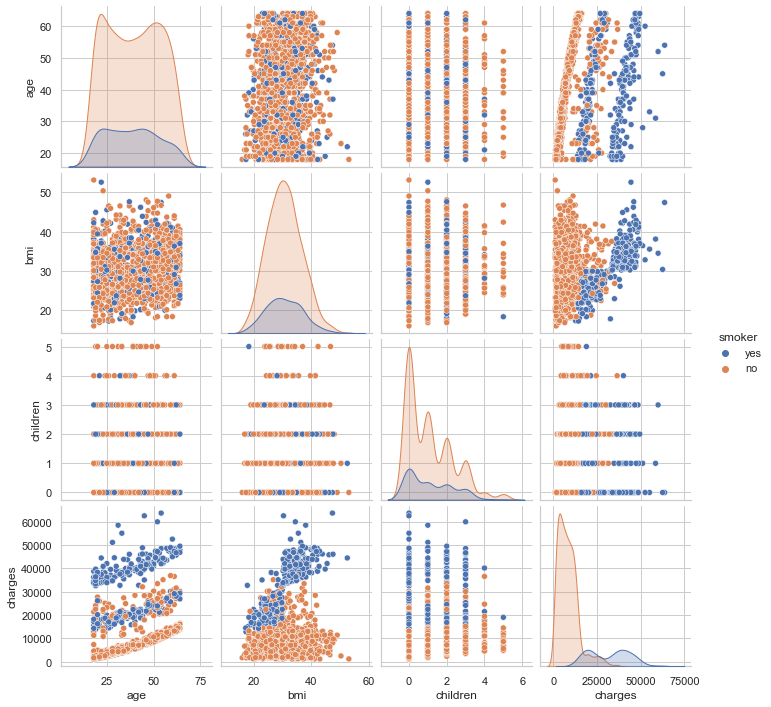

In [53]:
sns.pairplot(data=df, hue='smoker', height=2.5)
plt.show()

## Plot 3D

In [54]:
fig = py.scatter_3d(df,x='charges',y='bmi',z='charges',color ='smoker')

fig.show()

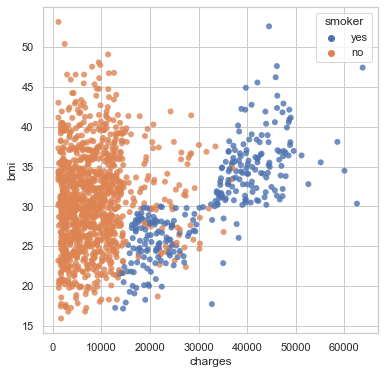

In [55]:
# Un scatter plot para visualizar dos variables
fig, (ax0) = plt.subplots(1,1,figsize=(6,6))
g=sns.scatterplot(x="charges", y="bmi", data=df, hue = 'smoker', 
                  linewidth=0, alpha = 0.8,ax=ax0)
plt.show()

## Correlation Matrix

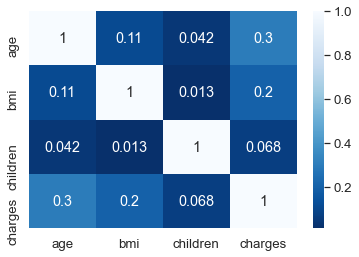

In [56]:
numeric_colum = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_colum].values.T)
sns.set(font_scale = 1.2)
sns.heatmap( cm,annot=True,cmap="Blues_r",yticklabels=numeric_colum,xticklabels=numeric_colum)
plt.show()

# Preprocessing

## Get Dummies

In [57]:
df1 = pd.get_dummies( df, columns=['sex','smoker','region'], drop_first=True)
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [58]:
df1.columns.values

array(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

## Correlation Matrix with Dummies

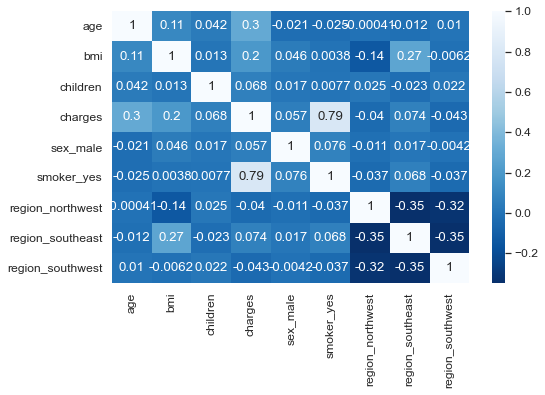

In [59]:
plt.figure(figsize=(8,5))
numeric_colum1 = ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest']
cm1 = np.corrcoef(df1.values.T)
sns.set(font_scale = 1.1)
sns.heatmap( cm1,annot=True,cmap="Blues_r",yticklabels=numeric_colum1,xticklabels=numeric_colum1)
plt.show()

In [60]:
df1.drop_duplicates(subset='charges',keep='first',inplace=True)

In [61]:
print(df.shape)
print(df1.shape)

(1338, 7)
(1337, 9)


In [62]:
df1.columns.values

array(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

## Define X & Y

### X

In [63]:
X = df1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest']]

In [64]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


#### Look scale X

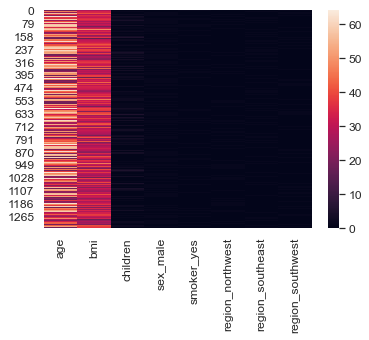

In [65]:
sns.heatmap(X)
plt.show()

### Y

In [66]:
y = df1[[ 'charges']]

In [67]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Separate in Train & Test

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

In [69]:
print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {y_train.shape}\n')
print(f'X_test.shape  {X_test.shape}')
print(f'y_test.shape  {y_test.shape}')

X_train.shape (935, 8)
y_train.shape (935, 1)

X_test.shape  (402, 8)
y_test.shape  (402, 1)


## Scaler Train

We need calculate mu and sigma for standarized. 

The test is a manner for simulate the aplication of our model training so no used date of the test for standarized

In [70]:
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

## Transform Train

In [71]:
X_train_scal = scaler_X.transform( X_train )  
y_train_scal = scaler_y.transform( y_train ) 

## Transform Test 

In [72]:
X_test_scal = scaler_X.transform( X_test )  
y_test_scal = scaler_y.transform( y_test )  

# Training Linear Regression Model 

## Define Model

In [73]:
model = LinearRegression()

## Training Model

In [74]:
model.fit( X_train_scal , y_train_scal )

LinearRegression()

In [75]:
model.get_params() 

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## Predict

In [92]:
y_pred = model.predict(X_test_scal)
y_pred

array([ 1.15020937, -0.17556668, -0.11549024, -0.11926515, -0.02437219,
       -0.98619766,  0.14662451,  1.57357239,  1.92344383, -0.92465699,
       -0.23072511,  1.72197604,  1.04322711,  0.07595477,  0.32317725,
        2.27673833, -0.12294764,  0.16242452,  2.11125424, -0.87478697,
       -0.90988152,  0.16078648, -0.36922455, -0.78830761, -0.34000531,
        1.56504942,  2.03163621, -0.33498198,  1.56749758, -0.24514256,
       -1.07407516, -0.94778474,  0.06479263, -0.74898413, -0.30266525,
       -0.97733438,  0.22373545,  0.14338261, -0.65108553, -1.13685327,
        0.06530611, -0.17443957, -0.50448591,  1.45771699, -0.30396681,
       -0.0951839 ,  1.7181573 , -0.60638879,  0.01557097,  0.0058185 ,
       -0.53424149, -0.80513066,  1.0285565 , -0.65137301, -0.92744983,
       -0.11168997, -0.01429541, -0.88121189, -1.19082631, -0.76640743,
       -0.18713376, -0.56293274, -0.5726157 , -0.12443656,  2.01136124,
       -0.25894495, -0.67303978, -0.60074838, -0.10080499,  0.13

In [77]:
y_pred

array([[ 1.15020937],
       [-0.17556668],
       [-0.11549024],
       [-0.11926515],
       [-0.02437219],
       [-0.98619766],
       [ 0.14662451],
       [ 1.57357239],
       [ 1.92344383],
       [-0.92465699],
       [-0.23072511],
       [ 1.72197604],
       [ 1.04322711],
       [ 0.07595477],
       [ 0.32317725],
       [ 2.27673833],
       [-0.12294764],
       [ 0.16242452],
       [ 2.11125424],
       [-0.87478697],
       [-0.90988152],
       [ 0.16078648],
       [-0.36922455],
       [-0.78830761],
       [-0.34000531],
       [ 1.56504942],
       [ 2.03163621],
       [-0.33498198],
       [ 1.56749758],
       [-0.24514256],
       [-1.07407516],
       [-0.94778474],
       [ 0.06479263],
       [-0.74898413],
       [-0.30266525],
       [-0.97733438],
       [ 0.22373545],
       [ 0.14338261],
       [-0.65108553],
       [-1.13685327],
       [ 0.06530611],
       [-0.17443957],
       [-0.50448591],
       [ 1.45771699],
       [-0.30396681],
       [-0

## Performance Metrics

### R2

In [78]:
r2 = metrics.r2_score(y_test_scal,y_pred)
print(f'R2 : { r2.round(4)} ')

R2 : 0.7592 


### MSE 

In [79]:
mse = metrics.mean_squared_error(y_test_scal,y_pred)
print(f'MSE : { mse.round(4)} ')

MSE : 0.2341 


### Residuals

In [80]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [88]:
X_cols = X.columns.values

In [90]:
y_test_reshape = y_test.values.reshape(-1)

In [93]:
print("=================Summary====================")
stats.summary(model,X_test_scal,y_test_reshape ,X_cols)

=================Summary====================
Residuals:
        Min          1Q     Median         3Q        Max
-58569.4368 -16311.8648 -8857.5512 -4890.1989 -1137.3093


Coefficients:
                  Estimate   Std. Error  t value   p value
_intercept        0.000000   891.740789   0.0000  1.000000
age               0.323691   924.268642   0.0004  0.999721
bmi               0.164560   918.932153   0.0002  0.999857
children          0.048453   930.251769   0.0001  0.999958
sex_male         -0.010954   889.241565  -0.0000  0.999990
smoker_yes        0.791292   880.437642   0.0009  0.999283
region_northwest -0.007478  1080.537942  -0.0000  0.999994
region_southeast -0.045694  1049.552841  -0.0000  0.999965
region_southwest -0.032101   997.362799  -0.0000  0.999974
---
R-squared:  -1.19357,    Adjusted R-squared:  -1.23823
F-statistic: -26.73 on 8 features


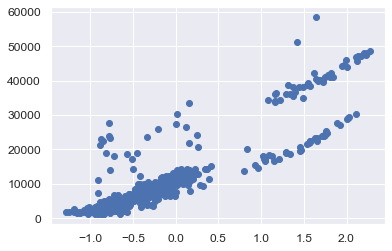

In [95]:
residuals = np.subtract(y_test_reshape, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()


In [ ]:


"""## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.
"""

df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

"""Analizando el segundo modelo"""

X_cols = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()